In [126]:
import boto3
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import datetime
import numpy as np

In [127]:
client = boto3.client('timestream-query')
%matplotlib inline

In [128]:
interval = "1m"
period = '1d'

In [129]:
response = client.query(
    QueryString='SELECT BIN(time, ' + interval +') AS BINNED_TIMESTAMP, ROUND(AVG(measure_value::double), 2) AS TEMPERATURE, ROOM as ROOM FROM "TemperatureHistory"."TemperatureHistory" WHERE measure_name = \'TEMPERATURE\' AND ROOM = \'office\' AND time > ago(' + period + ') GROUP BY measure_name, BIN(time, ' + interval + '), ROOM ORDER BY BINNED_TIMESTAMP ASC'
)

In [130]:
time = []
temperature = []

for x in response['Rows']:
    raw_date = x["Data"][0]["ScalarValue"]
    raw_temperature = x["Data"][1]["ScalarValue"]
    formatted_date = datetime.datetime.strptime(raw_date, "%Y-%m-%d %H:%M:%S.%f000")

    temperature.append(raw_temperature)
    time.append(str(formatted_date.hour) + ":" + str(formatted_date.minute))

In [131]:
print("Average temperature over this period: " + str(sum([float(i) for i in temperature]) / len(temperature)) + "oC")
print("Seen data points: " + str(len(temperature)))

Average temperature over this period: 20.489684210526356oC
Seen data points: 1425


In [132]:
float_temperatures = [float(temp) for temp in temperature]

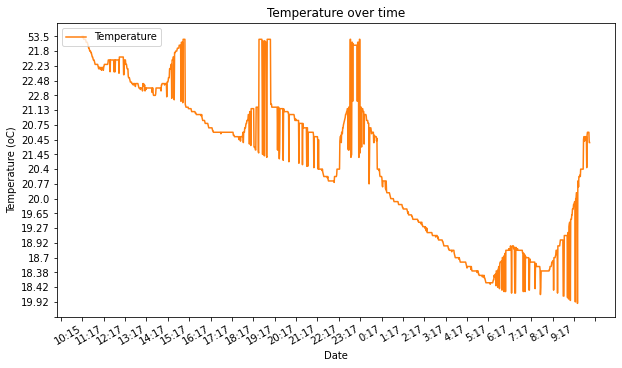

In [133]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.yaxis.set_major_locator(plticker.MultipleLocator(10))
ax.xaxis.set_major_locator(plticker.MultipleLocator(60))

plt.gca().invert_yaxis() # For some reason temperature is descending, we want to flip that

fig.autofmt_xdate()

ax.plot(time, temperature, color='tab:orange', label='Temperature')

ax.set_xlabel('Date')
ax.set_ylabel('Temperature (oC)')
ax.set_title('Temperature over time')
ax.legend(loc='upper left');